# Agglomerative Clustering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Part 1 (set1.txt)

### Exploratory Data Analysis

In [4]:
set1 = pd.read_csv("set1.txt")
set1.head()

,X1,X2
0,664159,550946
1,665845,557965
2,597173,575538
3,618600,551446
4,635690,608046


In [6]:
set1.describe()

,X1,X2
count,5000.000000,5000.000000
mean,514937.556600,494709.292800
std,244465.901926,235840.852969
min,19835.000000,51121.000000
25%,320352.500000,320107.750000
50%,505338.500000,526259.500000
75%,786228.750000,713713.500000
max,961951.000000,970756.000000


In [7]:
set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
X1    5000 non-null int64
X2    5000 non-null int64
dtypes: int64(2)
memory usage: 78.2 KB


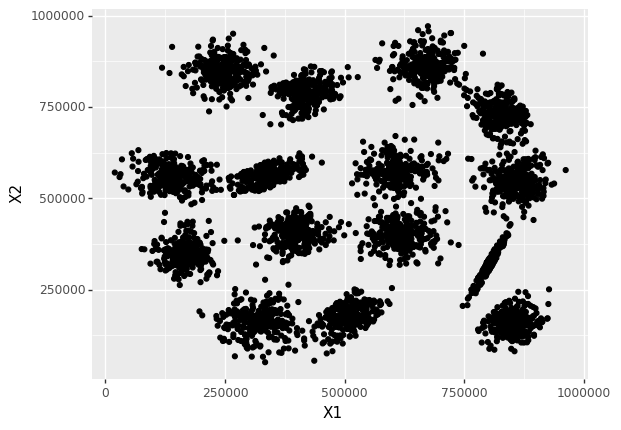

<ggplot: (295248633)>

In [31]:
ggplot(set1,aes(x="X1",y="X2"))+geom_point()

**Given this graph of the data, we know we should have 15 clusters.**

### Dendrogram

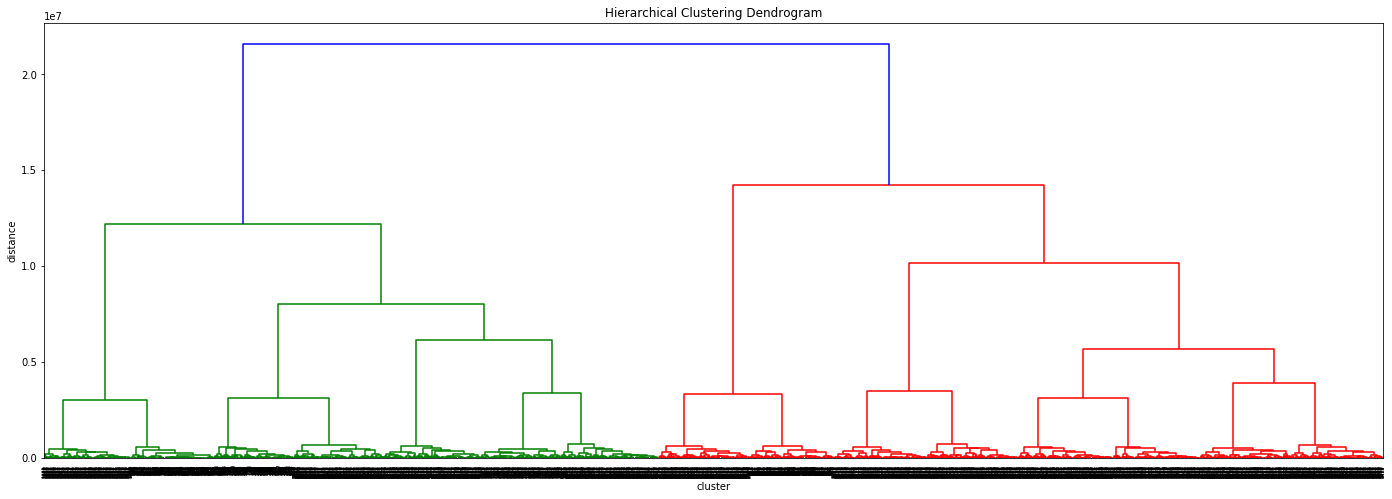

In [33]:
linkage_matrix = linkage(set1,"ward")
figure = plt.figure(figsize=(24,8))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("cluster")
plt.ylabel("distance")
plt.show()

**Based on the above dendrogram, the optimized number of clusters is 2. However, the range between splits is still really large at distance 0.25e7 and shrinks dramatically after that point. Given this knowledge as well as the plot of our data, we should make our cutoff at this point.**

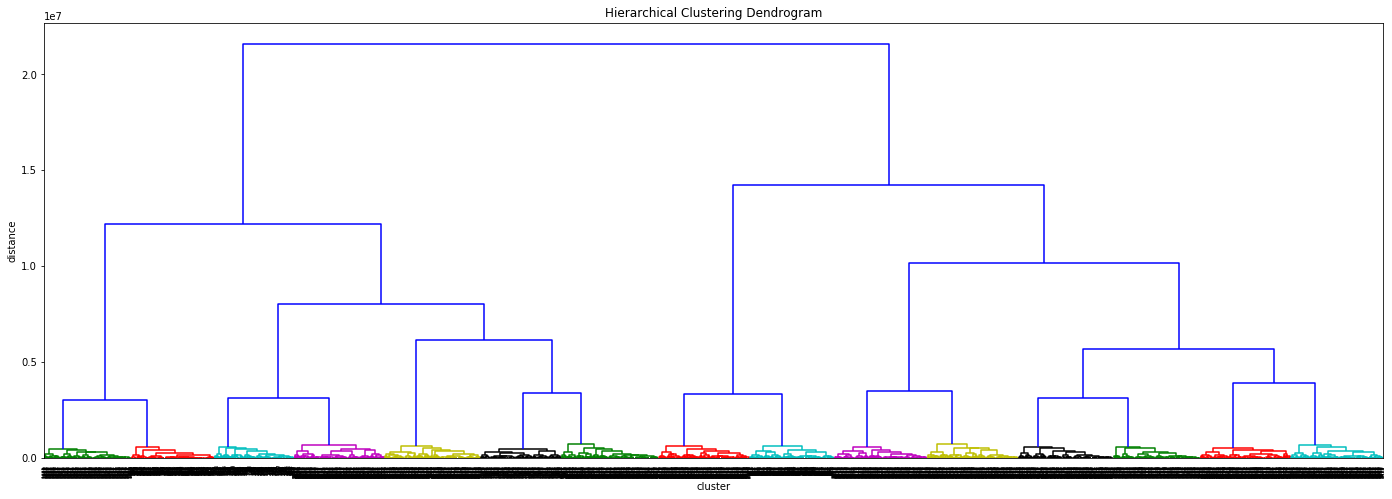

In [5]:
figure = plt.figure(figsize=(24,8))
dendrogram(linkage_matrix,color_threshold=0.25e7)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("cluster")
plt.ylabel("distance")
plt.show()
plt.show()

**Given this denrogram, we should split our data into 15 clusters.**

### Agglomerative Clustering

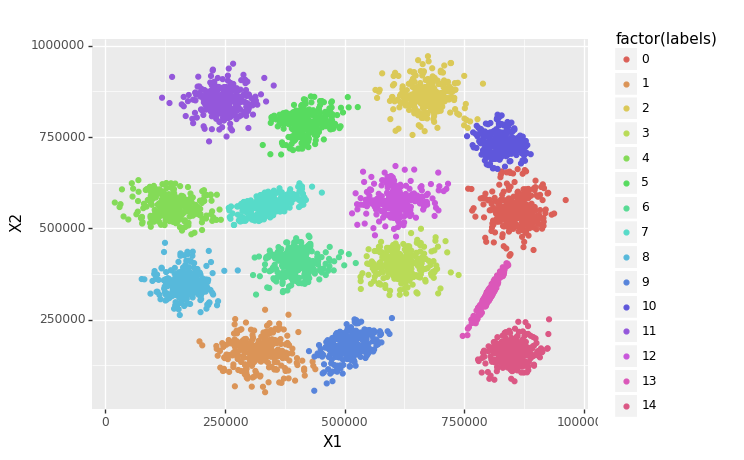

<ggplot: (313365665)>

In [5]:
clustering = AgglomerativeClustering(linkage="ward",n_clusters=15)
clustering.fit(set1)
set1["labels"] = clustering.labels_
ggplot(set1,aes(x="X1",y="X2",color="factor(labels)"))+geom_point()

## Part 2 (winequality-red.csv)

### Exploratory Data Analysis

In [2]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Remove outliers from wine data set using z-scores (z-scores of 3 or more are considered unusual).**

In [19]:
z_scores = stats.zscore(wine)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
filtered_wine = wine[filtered_entries]
filtered_wine.groupby("quality").describe()

fixed acidity                                                   \
                count      mean       std  min   25%   50%   75%   max   
quality                                                                  
4                47.0  7.923404  1.588986  5.0  6.85  7.50   8.4  12.5   
5               617.0  8.115559  1.483661  5.0  7.10  7.80   8.9  13.5   
6               586.0  8.368771  1.713884  5.2  7.10  7.90   9.4  13.4   
7               185.0  8.812973  1.809259  5.1  7.40  8.80  10.1  13.3   
8                16.0  8.981250  1.853004  5.6  7.70  8.85  10.4  12.6   

        volatile acidity            ...       PC1              PC2            \
                   count      mean  ...       75%       max  count      mean   
quality                             ...                                        
4                   47.0  0.682447  ...  0.064091  0.762505   47.0 -0.059375   
5                  617.0  0.568720  ...  0.241119  0.983755  617.0 -0.201286   
6                  586.0  0.500563  ...  0.520883  0.981087  586.0  0.109132   
7                  185.0  0.409649  ...  0.725577  0.999701  185.0  0.417247   
8                   16.0  0.419375  ...  0.698230  0.970402   16.0  0.504884   

                                                                     
              std       min       25%       50%       75%       max  
quality                                                              
4        0.375241 -0.764582 -0.368892 -0.050691  0.213411  0.845243  
5        0.378080 -0.908843 -0.494484 -0.244513  0.058574  0.828727  
6        0.406490 -0.848880 -0.185054  0.114283  0.421977  0.918373  
7        0.352725 -0.457073  0.166695  0.487290  0.708491  0.946790  
8        0.282486 -0.052161  0.363850  0.447882  0.792301  0.929844  

[5 rows x 104 columns]

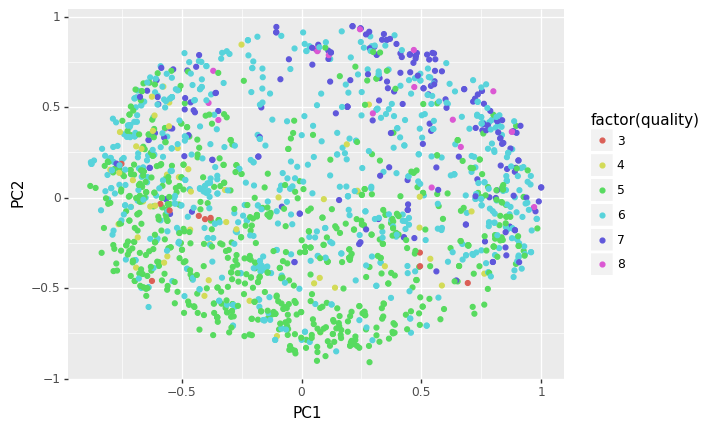

<ggplot: (312934741)>

In [39]:
ggplot(filtered_wine,aes(x="PC1",y="PC2",color="factor(quality)"))+geom_point()

### PCA

**Remove quality attribute from wine data for preprocessing.**

In [13]:
features = filtered_wine.iloc[:,0:11]

**Add first 2 columns generated by PCA to wine dataset.**

In [14]:
features = StandardScaler().fit_transform(features)
features = Normalizer().fit_transform(features)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
filtered_wine["PC1"] = principalComponents[:,0]
filtered_wine["PC2"] = principalComponents[:,1]
filtered_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,PC1,PC2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.702955,-0.256805
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.362404,-0.597009
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.482253,-0.553736
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.827677,-0.232890
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.702955,-0.256805


### Dendrogram

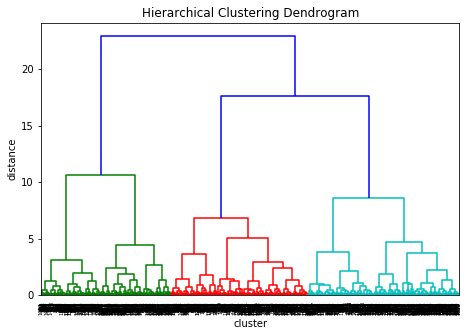

In [15]:
X = filtered_wine[["PC1","PC2"]]
linkage_matrix = linkage(X,"ward")
figure = plt.figure(figsize=(7.5,5))

dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("cluster")
plt.ylabel("distance")
plt.show()

**Given this dendrogram, the optimal number of clusters is 3. Although there are in fact 5 quality attributes (1 was eliminated as it was an outlier), most of the data lies in 5-7 range.**

### Aglomerative Clustering

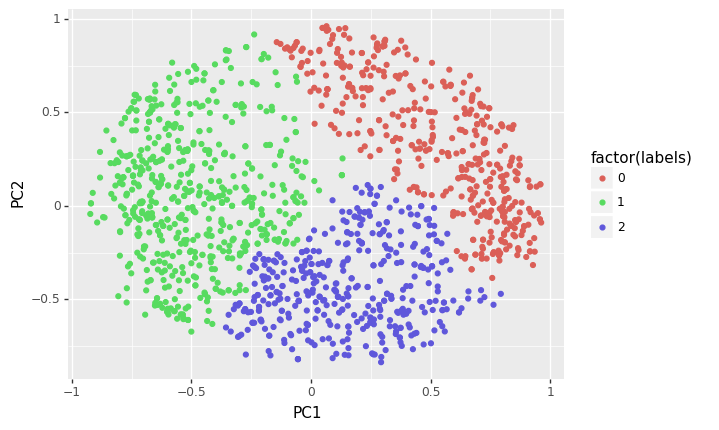

<ggplot: (310632049)>

In [43]:
clustering = AgglomerativeClustering(linkage="ward",n_clusters=3)
clustering.fit(X)
filtered_wine["labels"] = clustering.labels_
ggplot(filtered_wine,aes(x="PC1",y="PC2",color="factor(labels)"))+geom_point()